In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as sl

In [111]:
df = pd.read_csv('data/results.csv', usecols=['meters', 'price', 'rooms', 'dealer', 'district'], na_values=['Zapytajocenę'])

In [112]:
df = df.dropna()

In [132]:
q = df["meters"].quantile(0.99)

In [133]:
df = df[df["meters"] < q]

In [134]:
q = df["price"].quantile(0.99)

In [135]:
df = df[df["price"] < q]

In [137]:
df.rooms = df.rooms.astype(int)

In [138]:
x_axis = np.array([df.price]).reshape(-1, 1)
y_axis = np.array(df.meters.tolist())


regresja = sl.LinearRegression()

regresja.fit(x_axis, y_axis)

regresja = sl.LinearRegression()

regresja.fit(x_axis, y_axis)
print('Wyraz wolny jest równy: %s' % np.round(regresja.intercept_, 30))
print('Współczynnik kierunkowy wynosi: %s' % np.round(regresja.coef_, 30))
print('Współczynnik dopasowania wynosi: %s' % np.round(regresja.score(x_axis, y_axis),30))



Wyraz wolny jest równy: 7.566328718578291
Współczynnik kierunkowy wynosi: [0.00014735]
Współczynnik dopasowania wynosi: 0.7046784633812015


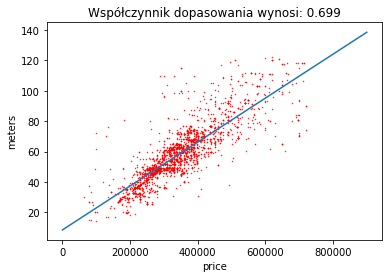

In [139]:
P = np.array([0.0001447 * x + 8.360059306962654 for x in np.linspace(1, 900000, 10000)])

fig = plt.figure()
plt.scatter(x_axis, y_axis, c='r', s=0.2)
plt.plot(np.linspace(1, 900000, 10000), P)
plt.xlabel('price')
plt.ylabel('meters')
plt.title('Współczynnik dopasowania wynosi: 0.699')
fig.savefig('linear_regression.pdf')
plt.show()

In [140]:
X_new = [[800000]]

In [141]:
model = regresja.predict(X_new)
print("Za kwotę {} mieszkanie ma {} m2".format(X_new[0][0], round(model[0], 2)))

Za kwotę 800000 mieszkanie ma 125.44 m2


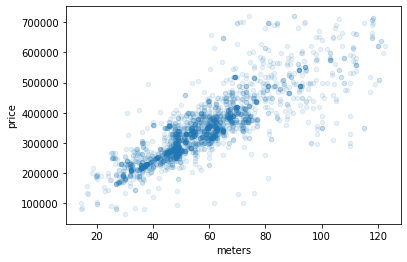

In [145]:
df.plot(kind="scatter", x="meters", y="price", alpha=0.1)